In [1]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [23]:
df = pd.read_excel("https://github.com/grahamharrison68/Public-Github/blob/master/Analyzing%20Customer%20Feedback/data/out/Womens%20Clothing%20E-Commerce%20Reviews%20with%20Emotions.xlsx?raw=true")
    
df.dropna(inplace=True) 
df.reset_index(drop=True, inplace=True)
df_new = df.drop(['index'], axis = 1)

In [24]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Review Rating,1753.0,4.236167,1.051805,1.000000,4.000000,5.000000,5.000000,5.0
Review Positive Feedback Count,1753.0,2.763833,6.480046,0.000000,0.000000,1.000000,3.000000,94.0
Review Polarity,1753.0,0.256329,0.165483,-0.409524,0.156771,0.246830,0.353571,1.0
Review Subjectivity,1753.0,0.128830,0.227233,-0.440476,-0.020000,0.118078,0.266667,1.0
Review Length,1753.0,327.610953,140.034961,16.000000,208.000000,332.000000,482.000000,506.0
Review Word Count,1753.0,63.896178,27.774934,2.000000,41.000000,64.000000,91.000000,111.0
Reviewer Age,1753.0,43.575585,12.386200,19.000000,35.000000,41.000000,52.000000,93.0
Emotion Score,1753.0,0.708121,0.111795,0.500607,0.625593,0.690430,0.792305,1.0
Product ID,1753.0,925.262978,193.651605,2.000000,860.000000,940.000000,1072.000000,1204.0
Recommended?,1753.0,0.832858,0.373209,0.000000,1.000000,1.000000,1.000000,1.0


C:\Users\proto\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


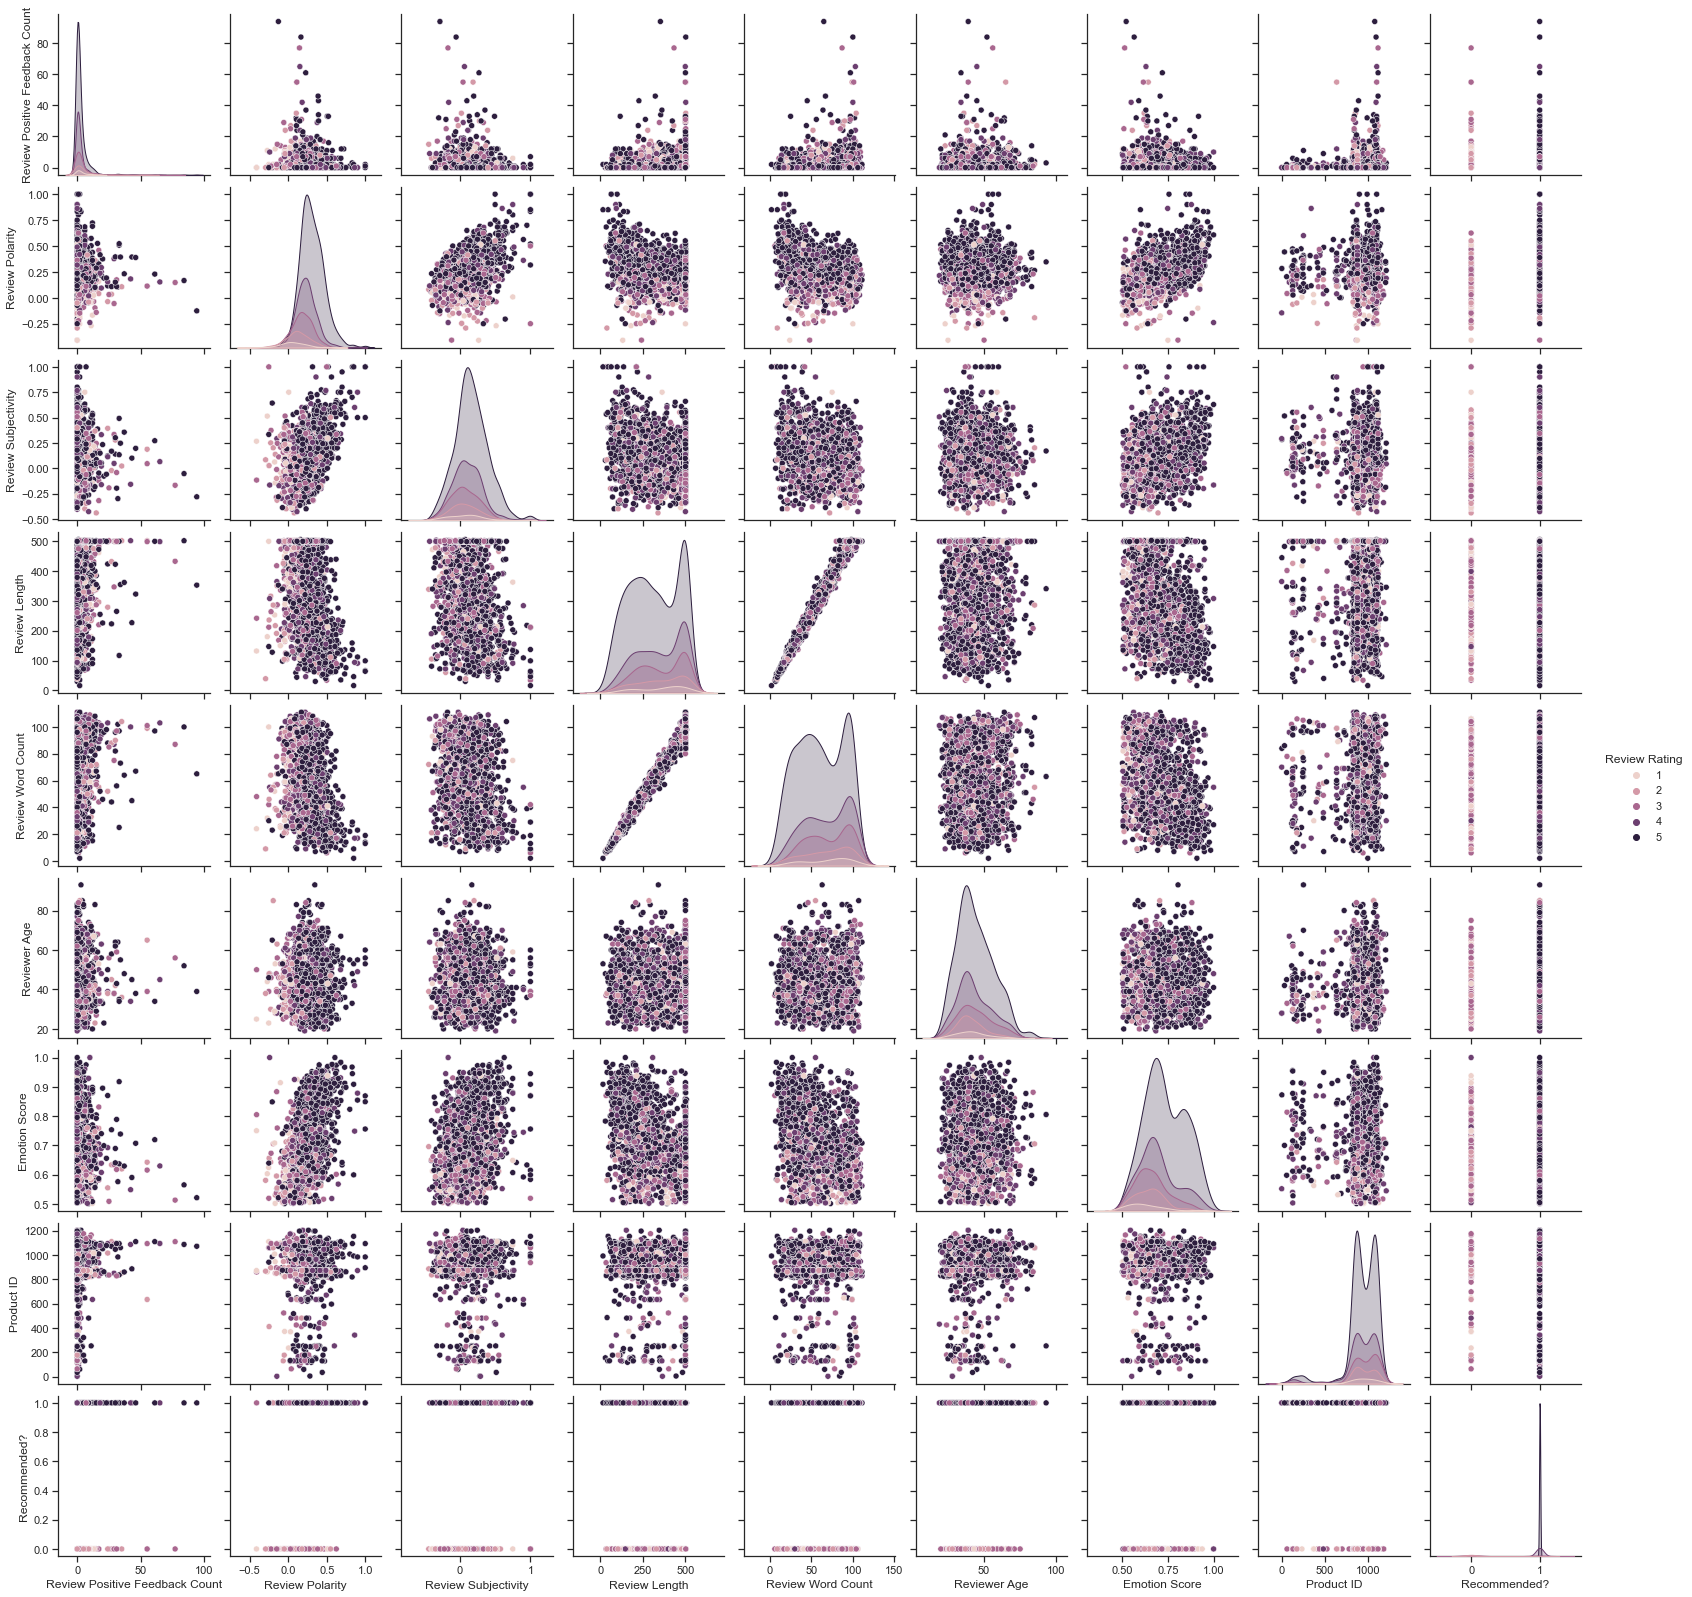

In [25]:
import seaborn as sns

sns.set_theme(style="ticks")
sns.pairplot(df_new, hue="Review Rating")

In [27]:
df_new.head()

,Review Title,Review Text,Review Rating,Review Positive Feedback Count,Review Polarity,Review Sentiment,Review Subjectivity,Review Length,Review Word Count,Review Text Cleaned,...,Reviewer Age,Reviewer Age Category,Emotion,Emotion Score,Division,Department,Product ID,Product Name,Product Category,Recommended?
0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,0,0.550000,Positive,0.250000,124,22,"I love, love, love this jumpsuit. It is fun, f...",...,50,45-54,Joy,0.972142,General Petite,Bottoms,1049,Product 1049,Pants,1
1,Flattering shirt,This shirt is very flattering to all due to th...,5,6,0.512891,Positive,0.137500,192,36,This shirt is very flattering to all due to th...,...,47,45-54,Joy,0.844207,General,Tops,847,Product 847,Blouses,1
2,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,4,0.178750,Positive,0.066250,488,98,"I love tracy reese dresses, but this one is no...",...,49,45-54,Joy,0.668897,General,Dresses,1080,Product 1080,Dresses,0
3,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,0.133750,Positive,0.215556,496,101,I aded this in my basket at hte last mintue to...,...,39,35-44,Joy,0.573683,General Petite,Tops,858,Product 858,Knits,1
4,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,4,0.171635,Positive,-0.007692,482,97,"I ordered this in carbon for store pick up, an...",...,39,35-44,Joy,0.554208,General Petite,Tops,858,Product 858,Knits,1
